## Experiment with Gene sets to see where they map to the Waterston O’Rourke  Atlas of Cell Types

- Iterate through a list of genes 
- Identify if the gene is expressed at a given threshold
- Map the gene and its expression (yes/no) to the single-cell atlas of aging UMAP
- Save the UMap Images for each iteration and a CVS with Cell counts and the Cumulative Expressions used to create the image

### Actions to be taken on the below cell to set up your experiment
- Upload Wormbase Data to the single_cell directory
  - You can also create a file and copy-paste the Wormbase IDs
  - Make sure you have a CSV header of `wormbase_id` at the top of the file
- Give the file a title
  - This will be used in the plot output and also used to create the file names
- Set the Min and Max expression levels to iterate over
  - The levels are incremented by two, stepping through the range provided
  - For the most part providing a 0 Min will show that your genes are expressed everywhere (not so helpful)


In [13]:
import pandas as pd

# Load Genes to be processes
input_dir='./input_data'
genes_to_evaluate_df = pd.read_csv(f'{input_dir}/experiment1.csv') 
print(genes_to_evaluate_df)

# Set the sub title for the chart 
# title is also used for prefix of output file
title='experiment1'

# Set the min and max level of gene expression to evaluate
# Note: expression evaluation steps 2 from min up to and including max 
express_min = 2
express_max = 2

# include_gene_in_cells If True, create counts for Genes in Cells
# NOTE: This will increase the run time substantially if True
include_gene_in_cells = True 


       wormbase_id
0   WBGene00000698
1   WBGene00000713
2   WBGene00000751
3   WBGene00000609
4   WBGene00000757
..             ...
94  WBGene00018803
95  WBGene00004478
96  WBGene00014309
97  WBGene00012664
98  WBGene00006537

[99 rows x 1 columns]


### Load the `ad_worm_aging.h5ad` data
- `x_df` contains the Dense Matrix of the data
  - Each row represents an Observation of a Cell at a timepoint
  - Each row contains a column for every gene and provides data on if it was expressed for this cell at this timepoint
- `obs_df` contains summary data for all the observations
- `var_df` contains summary data for all genes that showed some level of expression

In [14]:
# Load anndata data and setup base variables
import anndata as ad
import pandas as pd
from scipy.sparse import csr_matrix

# Load the h5ad file
cds_baseline = ad.read(f"{input_dir}/cds_baseline.h5ad")

x_df = pd.DataFrame(data=csr_matrix.todense(cds_baseline.X))

obs_df = cds_baseline.obs

var_df = cds_baseline.var
var_df.reset_index(drop=True, inplace=True)



### Map Wormbase IDs to `x_df` Column index
- Here, we map the provided wormbase ids to the column index in the x_df dataframe
- If a Wormbase ID does not have an index, it is not included, and a summary of the number of Genes not found is printed after the cell executes

In [15]:
x_df

,0,1,2,3,4,5,6,7,8,9,...,20212,20213,20214,20215,20216,20217,20218,20219,20220,20221
0,0.787005,0.000000,0.303578,0.633858,0.000000,0.000000,0.573823,0.000000,0.000000,0.329533,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,8.930314,0.000000,1.983197,9.926064,0.992940,4.955720,13.854450,0.990694,0.000000,6.931626,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,4.270398,0.710869,0.000000,2.678320,0.980217,1.063048,2.268123,0.000000,1.571009,1.179672,...,0.0,0.0,0.0,0.0,0.0,0.549133,0.0,0.0,0.0,0.0
3,10.982734,0.000000,0.998296,7.988013,0.998570,0.000000,1.995776,0.998111,2.989734,3.992067,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,3.725940,0.000000,2.778128,0.934394,0.000000,0.922319,3.639583,0.000000,1.723150,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154246,7.729475,0.000000,2.909333,8.661174,0.000000,0.000000,0.000000,2.904478,0.000000,3.857648,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
154247,3.753741,0.090531,0.318308,1.653549,0.000000,0.179716,0.935778,0.000000,0.828066,0.407543,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
154248,21.388600,3.360813,3.270876,11.250230,0.643124,1.857219,5.285266,2.570040,3.712769,0.632199,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
154249,13.873548,4.617840,3.692701,12.927728,0.000000,0.932559,8.281802,0.925175,0.925244,1.850381,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [16]:
obs_df

,cell,n.umi,umi.quant,condition,channel,Size_Factor,num_genes_expressed,bg.counts.YA.C.loadings,bg.counts.YA.F.loadings,sample,bg.counts.YA.C.1,bg.counts.YA.C.2,bg.counts.YA.C.3,bg.counts.YA.F.1,bg.counts.YA.F.2,bg.counts.YA.F.3,cluster,assigned_cell_type,cell_type_group
AAACCCAAGAGCATAT-YA.C.1_1,AAACCCAAGAGCATAT-YA.C.1,14358.0,0.999870,Control,channel_1,6.938175,2048,4.755645,5.016075,1,50.340539,11.979869,5.000279,39.995378,35.109120,-12.299341,25,Mature sperm,Germline
AAACCCAAGAGTCCGA-YA.C.1_1,AAACCCAAGAGTCCGA-YA.C.1,3029.0,0.999584,Control,channel_1,2.634118,847,3.636841,2.852419,1,9.920624,-21.549929,-29.205163,5.920338,-15.138413,-29.360190,26,hyp7 (hypodermis),Hypodermis
AAACCCAAGGCACCAA-YA.C.1_1,AAACCCAAGGCACCAA-YA.C.1,2055.0,0.999441,Control,channel_1,1.047053,774,8.147252,9.498474,1,-5.532245,15.636698,-0.323547,-7.277592,11.535314,3.562098,98,Spermatheca bag distal,Somatic gonad
AAACCCAAGTATCCTG-YA.C.1_1,AAACCCAAGTATCCTG-YA.C.1,14244.0,0.999869,Control,channel_1,12.629688,2991,-3.476010,-2.710223,1,-1.988961,1.635925,18.765959,6.475197,-5.926722,20.970288,22,Mitotic germ cells,Germline
AAACCCACACACTGGC-YA.C.1_1,AAACCCACACACTGGC-YA.C.1,802.0,0.998490,Control,channel_1,0.584567,500,2.792437,2.746773,1,0.493547,1.024362,4.867547,3.487626,-1.943538,5.525796,14,Differentiated germ,Germline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCAGTGTTG-YA.C.4_3,TTTGTTGTCAGTGTTG-YA.C.4,4993.0,0.999662,Control,channel_4,4.427029,-2147483648,NaN,NaN,3,55.396826,11.091631,5.599955,44.684674,36.521920,-13.037500,6,Mature sperm,Germline
TTTGTTGTCCATACAG-YA.C.4_3,TTTGTTGTCCATACAG-YA.C.4,851.0,0.997980,Control,channel_4,0.427732,-2147483648,NaN,NaN,3,-4.181464,18.652682,0.239774,-6.772101,16.801096,-0.030777,52,Spermatheca neck distal,Somatic gonad
TTTGTTGTCCGTAATG-YA.C.4_3,TTTGTTGTCCGTAATG-YA.C.4,1178.0,0.998591,Control,channel_4,0.499021,-2147483648,NaN,NaN,3,-10.518883,-11.521123,-9.690624,-13.407579,-12.146254,-7.581564,141,RMF,Neurons
TTTGTTGTCTACTATC-YA.C.4_3,TTTGTTGTCTACTATC-YA.C.4,749.0,0.997635,Control,channel_4,0.612192,-2147483648,NaN,NaN,3,-2.484966,5.192559,6.033446,0.087290,0.105120,5.820013,28,Intestine posterior,Intestine


In [17]:
var_df

,id,gene_short_name,num_cells_expressed,use_for_ordering
0,WBGene00010957,nduo-6,70940,FALSE
1,WBGene00010958,ndfl-4,51381,FALSE
2,WBGene00010959,nduo-1,49971,FALSE
3,WBGene00010960,atp-6,71492,FALSE
4,WBGene00010961,nduo-2,30773,FALSE
...,...,...,...,...
20217,WBGene00021597,spsb-1,4700,FALSE
20218,WBGene00021596,spsb-2,4434,FALSE
20219,WBGene00021595,Y46E12BL.2,6823,FALSE
20220,WBGene00021594,tig-3,199,FALSE


In [18]:
# Find the gene's index location in the Var_df
# This will provide the column position in Dense Matrix

# Add a column index that has the index of the gene in the dense matrix
# genes are indexed from 0 - 20,304

def find_index(row, var_df):
    ret_val = var_df.index[var_df['id'] == row['wormbase_id']].tolist()
    if ret_val == []:
        ret_val = None
    else:
        ret_val = int(ret_val[0])
    return ret_val

genes_to_evaluate_df['gene_index'] = genes_to_evaluate_df.apply(lambda row: find_index(row, var_df), axis=1)


# Check if we matched all the wormbase_id's from our input data set

# How many wormbase_id's where not found?
print(f"Wormbase Id's not found {genes_to_evaluate_df['gene_index'].isna().sum()}")

# Drop the Genes (Wormbase Ids) we did not find
genes_to_evaluate_df = genes_to_evaluate_df.dropna()
genes_to_evaluate_df.reset_index(drop=True, inplace=True)


Wormbase Id's not found 6


### Defining functions for Execution
* `remove_unneeded_genes` removes the genes (columns) that we are not interested in from x_df
* * This should improve the performance as we do not evaluate any genes that are not in the provided list
* `is_expressed` simple boolean function that returns Yes (True) if ANY gene in the observation has an expression value greater than the set threshold
* `plot_umap` Plots the results (Expressed / Not Expressed) on the UMAP and save the resulting image

In [19]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
from pathlib import Path
import json
%matplotlib inline

# remove the genes (columns) that we are not interested in from x_df
def remove_unneeded_genes(x_df, genes_to_evaluate_df):
    # Create an arrary of column indexies 
    gene_index = np.arange(0, len(x_df.columns), 1)
    
    # Create an array of the column indexies that we are interested in keeping
    gene_index_to_keep = genes_to_evaluate_df['gene_index'].values.astype(int)
    
    # Test whether each element of gene_index array is also present in gene_index_to_keep
    gene_keep_indicator = np.in1d(gene_index, gene_index_to_keep)
    
    # The list of columns to drop by negating the genes to keep list
    drop_columns = gene_index[~gene_keep_indicator]
    #print(f'drop_columns {len(drop_columns)} gene_index_to_keep {len(gene_index_to_keep)}  total {len(gene_index_to_keep)+len(drop_columns)}')
    return x_df.drop(x_df.columns[drop_columns], axis = 1)

# If ANY gene in the observation has an expression value greater than the set threshold return Yes
def is_expressed(obs_row, expression_threshold = 4):
    ret_val='No'
    values = obs_row.values
    if (values > expression_threshold).any():
        ret_val='Yes'
    return ret_val

# Plot the results on the UMAP and save the resulting image
def plot_umap(x_is_expressed_df, ad_worm_aging, title, threshold):
    fn_prefix=title.replace(' ', '_').lower()
    Path(f'./output_data/{fn_prefix}').mkdir(parents=True, exist_ok=True)

    x_umap = ad_worm_aging.obsm['UMAP']
    x_umap_df = pd.DataFrame(x_umap, columns = ['X','Y'])

    # Add the expressed column to the x_umap_df
    x_umap_df = x_umap_df.join(x_is_expressed_df['expressed'])
    # print(x_umap_df)

    # Create a color map
    colors = {'No':'#1f77b4', 'Yes':'#d62728'}

    plt.rcParams['figure.dpi'] = 500
    sss = plt.scatter(x_umap_df['X'],x_umap_df['Y'], c=x_umap_df['expressed'].map(colors), s=.008)
    plt.gca().set_aspect('equal', 'datalim')
    plt.suptitle(f"Projection of Genes [Threshold > {threshold}]")
    plt.title(title);
    plt.yticks([])
    plt.xticks([])
    
    patches = [ mpatches.Patch(color=colors[key], label=key) for key in colors.keys()]
    legend = plt.legend(handles=patches)
    legend.set_title("Expressed") 
    
    plt.savefig(f'./output_data/{fn_prefix}/{fn_prefix}_image_threshold_{threshold}.png')
    x_umap_df.to_csv(f"./output_data/{fn_prefix}/{fn_prefix}_x_umap_{threshold}.csv", index = False)
    
    

### Defining `collect_stats`; the summary stats that are collected

**obs_count** is equal to the number of times a gene had a higher instance expression value than the provided __expression_threshold__ over all 47,423 observations

**cum_expression** is equal to the cumulative observed expression for a gene whos instance expression value was higher than the provided __expression_threshold__ over all 47,423 observations

**max_expression** is equal to the maximum observed instance expression value for a gene whos instance expression value was higher than the provided __expression_threshold__ over all 47,423 observations

**instance expression value** is equal to the value found in the x_var (sparse matrix) [[column]] representing the gene expression for a given observation [[row]]


In [20]:
# Collect some basic stats on the run    
def collect_stats(trimmed_x_df, var_df, title, threshold, include_gene_in_cells):
    fn_prefix=title.replace(' ', '_').lower()
    
    # drop rows that are not expressed
    x_is_expressed_df = trimmed_x_df[trimmed_x_df.expressed == 'Yes']
    
    # drop the column 'expressed' they all are equal to 'Yes' so it adds no information
    x_is_expressed_df = x_is_expressed_df.drop(['expressed'], axis=1)
    
    # NOTE: This statement is interesting and may NOT be needed!
    # If a gene in an observation has an expression less than or equal to the threshold set its value to zero
    # Note: This does not impact the umap projection but may eliminate some noise in the stats data
    x_is_expressed_df = x_is_expressed_df.mask(x_is_expressed_df <= threshold, 0)

    # The number of time this gene showed up in an observation
    obs_count = x_is_expressed_df.apply(np.count_nonzero, axis=0)
    
    # Get details on genes in cells
    if include_gene_in_cells:
        genes_in_cells(x_is_expressed_df, obs_df, var_df, fn_prefix)
    
    # The cumulative expression for this gene accross all observations
    cum_expression = x_is_expressed_df.apply(np.sum, axis=0)
    
    # The maximinum expression value found over all observations
    max_expression = x_is_expressed_df.apply(np.max, axis=0)

    # Put the stats in a dataframe
    totals_df = obs_count.to_frame()
    totals_df = totals_df.rename(columns = {0:'obs_count'})
    totals_df['cum_expression'] = cum_expression   
    totals_df['max_expression'] = max_expression  

    totals_df['wormbase_id'] = totals_df.apply(lambda row: var_df.at[row.name, 'id'],axis=1 )
    totals_df['gene_index'] = totals_df.index

    # Sort the results and save to a file
    genes_to_evaluate_df_sorted = totals_df.sort_values(['obs_count', 'max_expression','cum_expression'],ascending = [True, True, True])
    genes_to_evaluate_df_sorted.to_csv(f"./output_data/{fn_prefix}/{fn_prefix}_stats_threshold_{threshold}.csv", index = False)
    return totals_df



In [21]:
# calculate the count of genes that are in specific cells

def genes_in_cells(x_is_expressed_df, obs_df, var_df, fn_prefix):
    genes_in_cell_type = {}
    genes_in_cell_type_group = {}
    
    #Initialize a dict with keys of gene ids
    for gene in x_is_expressed_df.columns:
        genes_in_cell_type[gene]={}
        genes_in_cell_type_group[gene]={}
        
    obs_reset_index_df = obs_df.reset_index()
    
    x_is_expressed_j_df = pd.merge(x_is_expressed_df, obs_reset_index_df, left_index=True, right_index=True, how='left')
    
    # For each observation
    for index, row in x_is_expressed_j_df.iterrows():
        # look at every gene to see if it was expressed at any level
        for gene in genes_in_cell_type.keys():
            if row[gene] > 0:
                # some expression was observed add 1 to the count
                gene_in_cell_type = genes_in_cell_type[gene]
                if row['assigned_cell_type'] in gene_in_cell_type:
                    gene_in_cell_type[row['assigned_cell_type']] += 1
                else:
                    gene_in_cell_type[row['assigned_cell_type']] = 1
                    
                # do the same for the cell type groups    
                gene_in_cell_type_group = genes_in_cell_type_group[gene]
                if row['cell_type_group'] in gene_in_cell_type_group:
                    gene_in_cell_type_group[row['cell_type_group']] += 1
                else:
                    gene_in_cell_type_group[row['cell_type_group']] = 1
                    
    ##############################
    df = pd.DataFrame(genes_in_cell_type)
    df = df.T
    df['wormbase_id'] = df.apply(lambda row: var_df.at[row.name, 'id'],axis=1 )
    df.insert(0, 'wormbase_id', df.pop('wormbase_id'))
    df.to_csv(f"./output_data/{fn_prefix}/genes_in_cell_type.csv", index=False)
    
    df = pd.DataFrame(genes_in_cell_type_group)
    df = df.T
    df['wormbase_id'] = df.apply(lambda row: var_df.at[row.name, 'id'],axis=1 )
    df.insert(0, 'wormbase_id', df.pop('wormbase_id'))
    df.to_csv(f"./output_data/{fn_prefix}/genes_in_cell_type_group.csv", index=False)
    #############################
    x_is_expressed_j_df.to_csv(f"./output_data/{fn_prefix}/{fn_prefix}_expressed_threshold_{threshold}.csv")
    

### Some addition details on is_expressed

Since we use vectorization it is no obvious from the code to see the logic of how we determine if a observation is defined as expressed or not the below pseudo code may help provide some clarity

```
For each observation row
    Look at the genes in the evaluation set (the ones provided in the CSV file)
       If any gene in that observation row shares a gene from the evaluation set 
         and the expression of that shared gene is above a given threshold 
            mark that observation as being expressed
```

Completed threshold 2.
Done


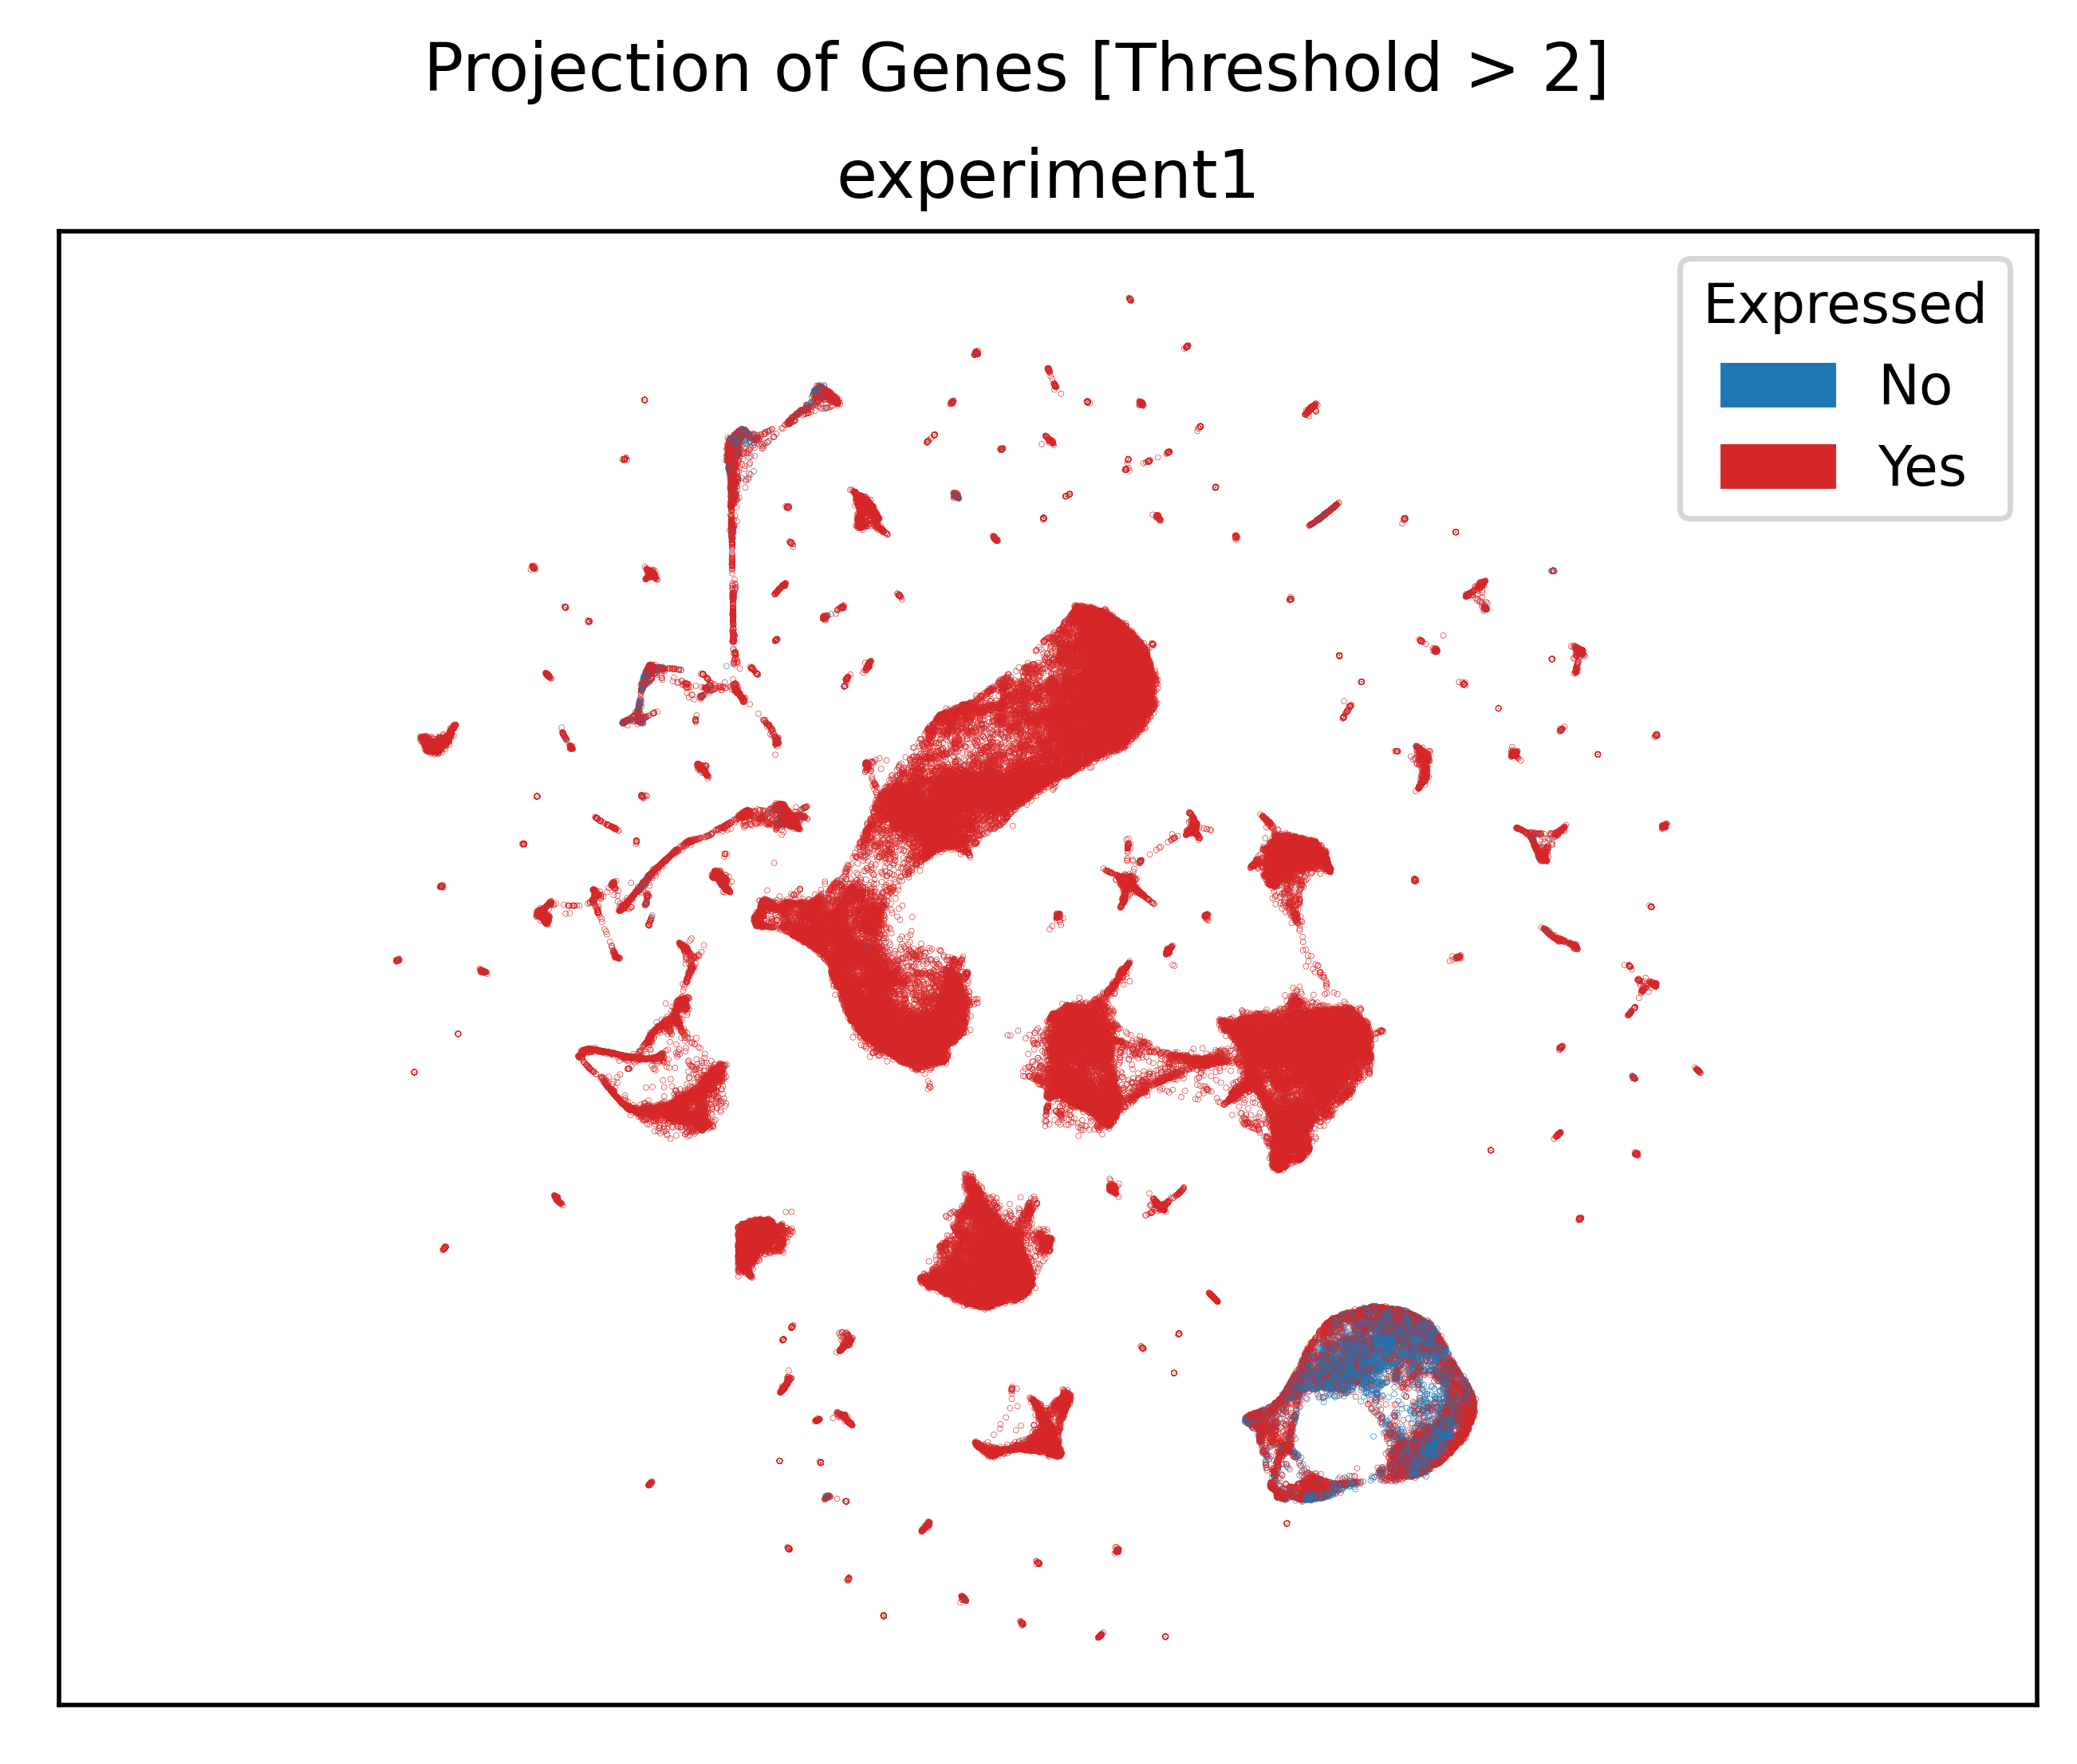

In [22]:

# Remove the columns we are not interested in for this experiment
trimmed_x_df = remove_unneeded_genes(x_df, genes_to_evaluate_df)

step=2 # Set the step increment
for threshold in range(express_min, express_max+step, step):
    # Test if the gene have a high enough level of expression to be included in the results
    x_is_expressed_series = trimmed_x_df.apply(lambda obs_row: is_expressed(obs_row, threshold), axis=1)
    trimmed_x_df['expressed'] = x_is_expressed_series

    # Plot the results on the UMAP Projection
    plot_umap(trimmed_x_df, cds_baseline, title, threshold)

    # Calculate some basic stats and save to a CSV file
    collect_stats(trimmed_x_df, var_df, title, threshold, include_gene_in_cells)
    
    print(f'Completed threshold {threshold}.')
    trimmed_x_df = trimmed_x_df.drop('expressed', axis = 1)

print(f'Done')

## Utility Functions
#### Resize Images
If you are experimenting and would like to resize the images for ease of display in the Notebook you can run the below code


In [11]:
# Resizing an Image by Percentage
from PIL import Image
from os import listdir
from os.path import isfile, join


def resize_by_percentage(image_file, percentage=0.40):
    with Image.open (image_file) as im:
        if im.size == (3200, 2400):
            width, height = im.size
            resized_dimensions = (int(width * percentage), int(height * percentage))
            resized = im.resize(resized_dimensions)
            resized.save(image_file)
        else:
            print(f'Already reduced {image_file}')


dir_path=f"./output_data/{title.replace(' ', '_').lower()}"
image_files = [join(dir_path, f) for f in listdir(dir_path) if isfile(join(dir_path, f)) and f[-4:]=='.png']
for image_file in image_files:
    resize_by_percentage(image_file)




In [12]:
import os
import zipfile

# utility function to zip a directory
def zip_directory(directory):
    file_name=f"{directory.replace(' ', '_').lower()}"    
    dir_path=f"./output_data/{file_name}"
    # Create a ZipFile object
    zip_file = zipfile.ZipFile(f'./output_data/{file_name}.zip', 'w')
    
    # Iterate over all the files in directory
    for folder, subfolders, files in os.walk(dir_path):
        for file in files:
            # Create complete filepath of file in directory
            file_path = os.path.join(folder, file)
            # Add file to zip
            zip_file.write(file_path)
    
    # Close the Zip File
    zip_file.close()
    print(f'Successfully created zip file: {file_name}.zip')
    

zip_directory(title)

Successfully created zip file: orourke_c37a2.6-f23c8.5.zip


# Appendix Cells
* The below cell are Not used

In [ ]:
#pip install line_profiler
%load_ext line_profiler
from time import sleep
#%lprun -f sleep sleep(1)
#%timeit sleep(1)

In [ ]:
%%bash

# Replace file name with the name of file to be resized
file_nm='muscle_function_image_threshold_0.png'
pic_size=`identify -format "%[fx:w]x%[fx:h]" ${file_nm}`

if [[ "${pic_size}" == "3200x2400" ]]; then
    echo image ${pic_size} resized
    convert ${file_nm} -resize 40% tmp_${file_nm}
    mv tmp_${file_nm} ${file_nm}
else
    echo image already resized ${pic_size}
fi